In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load CSV file
df = pd.read_csv('/content/breast-cancer.csv')

# Optional: View column names
print(df.columns)


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


🔹 Linear SVM Accuracy: 0.956140350877193
🔹 Classification Report (Linear):
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



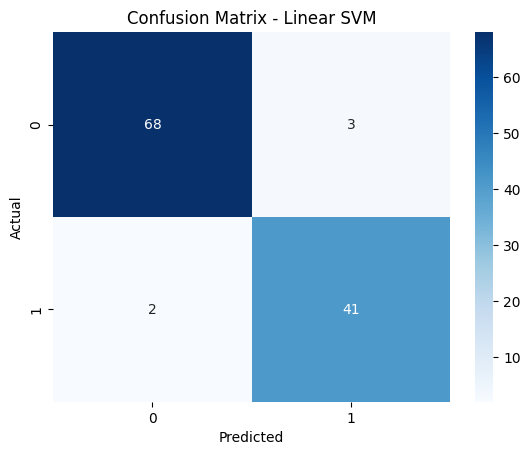

🔸 RBF SVM Accuracy: 0.9824561403508771
🔸 Classification Report (RBF):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



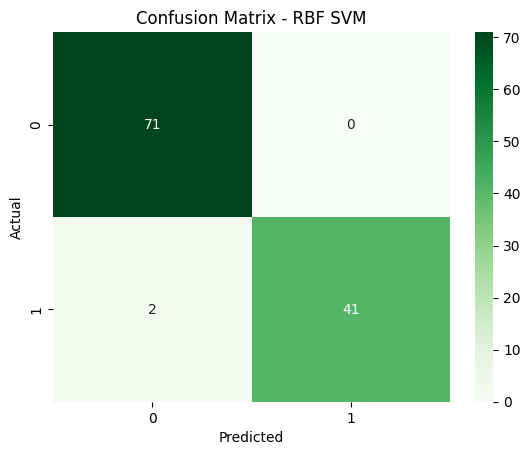

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- Linear SVM ----------
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("🔹 Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("🔹 Classification Report (Linear):")
print(classification_report(y_test, y_pred_linear))

# Confusion Matrix - Linear
cm_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------- RBF SVM ----------
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("🔸 RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("🔸 Classification Report (RBF):")
print(classification_report(y_test, y_pred_rbf))

# Confusion Matrix - RBF
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


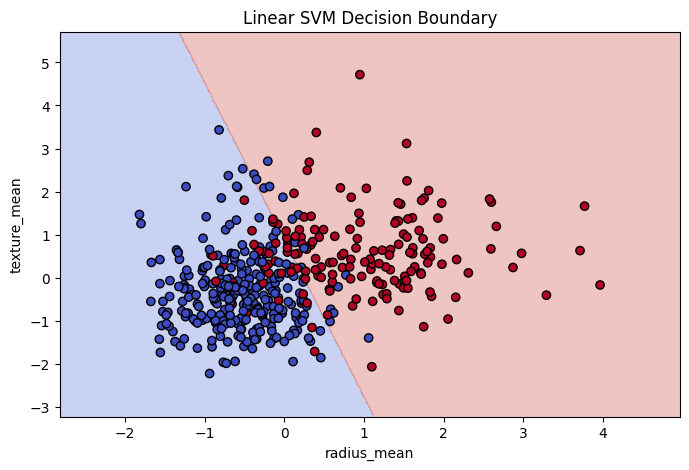

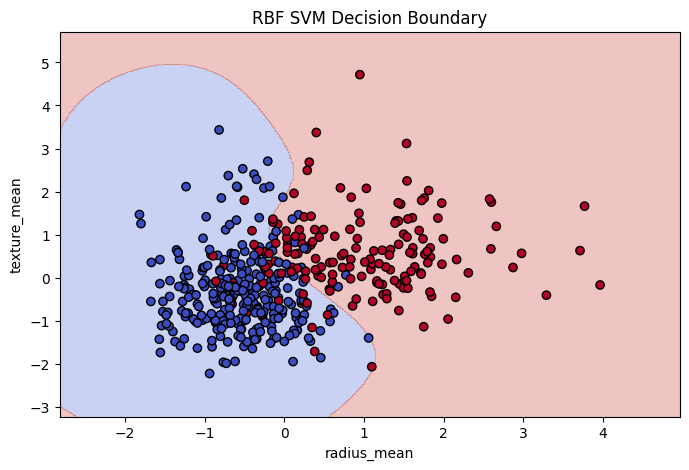

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/content/breast-cancer.csv')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select 2 features for visualization
features = ['radius_mean', 'texture_mean']  # Replace with exact column names in your CSV
X = df[features]
y = df['diagnosis']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit both SVMs
svm_linear = SVC(kernel='linear', C=1.0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.show()

# Plot Linear SVM
plot_decision_boundary(svm_linear, X_train_scaled, y_train, "Linear SVM Decision Boundary")

# Plot RBF SVM
plot_decision_boundary(svm_rbf, X_train_scaled, y_train, "RBF SVM Decision Boundary")


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# GridSearch with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred = best_model.predict(X_test)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validation Score:", grid_search.best_score_)
print("✅ Test Accuracy with Best Model:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
✅ Best Cross-Validation Score: 0.9054945054945055
✅ Test Accuracy with Best Model: 0.9122807017543859
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.88      0.88      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Define models
svm_linear = SVC(kernel='linear', C=1.0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

# Perform 5-fold cross-validation
cv_linear = cross_val_score(svm_linear, X_train, y_train, cv=5, scoring='accuracy')
cv_rbf = cross_val_score(svm_rbf, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print("🔹 Linear SVM Cross-Validation Accuracies:", cv_linear)
print("✅ Mean Accuracy (Linear SVM):", np.round(cv_linear.mean(), 4))

print("\n🔸 RBF SVM Cross-Validation Accuracies:", cv_rbf)
print("✅ Mean Accuracy (RBF SVM):", np.round(cv_rbf.mean(), 4))


🔹 Linear SVM Cross-Validation Accuracies: [0.89010989 0.87912088 0.92307692 0.85714286 0.85714286]
✅ Mean Accuracy (Linear SVM): 0.8813

🔸 RBF SVM Cross-Validation Accuracies: [0.85714286 0.91208791 0.95604396 0.87912088 0.85714286]
✅ Mean Accuracy (RBF SVM): 0.8923
